# validation_curve

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

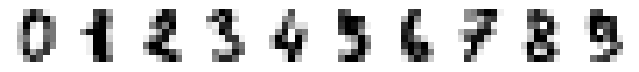

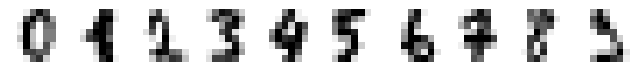

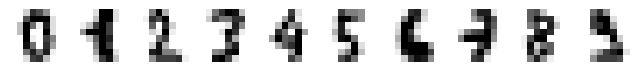

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
N = 30
nrows = (N//10)
 
for row in range(nrows):
    plt.figure(figsize=(8, 8))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(digits.images[i + row*10], cmap=plt.cm.gray_r, 
                   interpolation='nearest')
        plt.axis("off")
    plt.show()

In [3]:
from sklearn.svm import SVC
model = SVC().fit(X, y)
model

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [4]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [5]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

CPU times: total: 32 s
Wall time: 32.1 s


In [6]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\JK\AppData\Local\Temp\ipykernel_17028\3110610119.py:5: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$\gamma$")


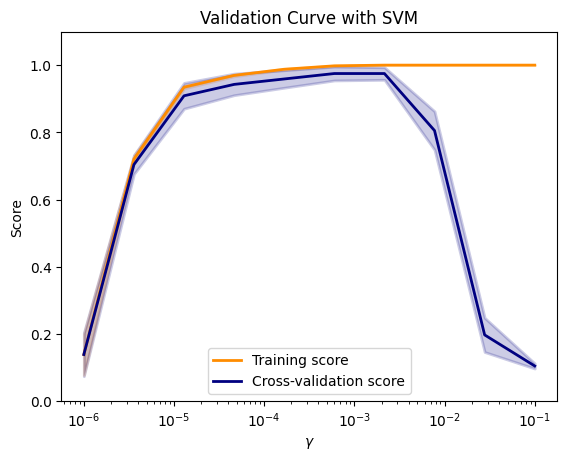

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [8]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X, y)
model

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",np.float64(0....4346900318843)
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [9]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

CPU times: total: 281 ms
Wall time: 17.1 s


# GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [11]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={'criterion':['gini', 'entropy'],
                                'max_depth':[3, 5, 7, 9]})

In [12]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]-3
grid.fit(redwine_X, redwine_y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 

In [13]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [14]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

In [16]:
%%time
selection = SelectKBest(k=1)
svm = SVC(kernel="linear")
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])
param_grid = dict(univ_select__k=[4, 5, 6, 7, 8, 9, 10, 11], svm__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, verbose=10)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.516 total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.584 total time=   0.0s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.516 total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.589 total time=   0.0s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END svm__C=0.1, univ_select__k=6;, score=0.519 total time=   0.1s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END svm__C=0.1, univ_select__k=6;

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...l='linear'))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'svm__C': [0.1, 1, ...], 'univ_select__k': [4, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",2
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 :

In [17]:
print(grid_search.best_estimator_)

Pipeline(steps=[('univ_select', SelectKBest(k=9)),
                ('svm', SVC(C=1, kernel='linear'))])


In [18]:
grid_search.best_params_

{'svm__C': 1, 'univ_select__k': 9}

In [19]:
grid_search.score(redwine_X, redwine_y)

0.5872420262664165

## PCA와 SelectKBest를 동시에 사용

In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [21]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

In [22]:
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca), ("selection", selection)])
X_features = combined_features.fit(iris_X, iris_y).transform(iris_X)
svm = SVC(kernel="linear")

In [23]:
pipeline = Pipeline([("features", combined_features), ("svm", svm)])
param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__selection__k=[1, 2],
                  svm__C=[0.1, 1, 10])

In [24]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, 
                           cv=5, verbose=10)
grid_search.fit(iris_X, iris_y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__selection__k=1, svm__C=0.1
[CV 1/5; 1/18] END features__pca__n_components=1, features__selection__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 2/5; 1/18] START features__pca__n_components=1, features__selection__k=1, svm__C=0.1
[CV 2/5; 1/18] END features__pca__n_components=1, features__selection__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 3/5; 1/18] START features__pca__n_components=1, features__selection__k=1, svm__C=0.1
[CV 3/5; 1/18] END features__pca__n_components=1, features__selection__k=1, svm__C=0.1;, score=0.867 total time=   0.0s
[CV 4/5; 1/18] START features__pca__n_components=1, features__selection__k=1, svm__C=0.1
[CV 4/5; 1/18] END features__pca__n_components=1, features__selection__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 5/5; 1/18] START features__pca__n_components=1, features__selection__k=1, svm__C=0.1
[CV 5/5; 1/18]

In [25]:
grid_search.score(iris_X, iris_y)

0.9733333333333334

In [26]:
import pandas as pd
pred = grid_search.predict(iris_X)
pd.crosstab(iris_y, pred, rownames=['True'], colnames=['Pred'], margins=True)

Pred,0,1,2,All
True,,,,
0,50,0,0,50
1,0,46,4,50
2,0,0,50,50
All,50,46,54,150


# BayesianOptimization

In [27]:
! pip install bayesian-optimization

In [28]:
from bayes_opt import  BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

In [29]:
def svc_crossval(C):
    model = SVC(C=C, random_state=42)
    # model.fit(iris_X, iris_y)
    # return model.score()
    cv_score = cross_val_score(model, iris_X, iris_y, cv=5)
    return np.mean(cv_score)

In [30]:
bo = BayesianOptimization(f=svc_crossval, pbounds={'C': (0.001, 100)}, 
                          random_state=42, verbose=2)
bo.maximize(init_points=10, # 초기 임의 탐색 횟수
            n_iter=30)      # 베이지안 최적화 반복 횟수

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.9733333 | 37.454637 |
| 2         | 0.9733333 | 95.071479 |
| 3         | 0.9733333 | 73.199662 |
| 4         | 0.9733333 | 59.866249 |
| 5         | 0.9800000 | 15.602708 |
| 6         | 0.9800000 | 15.600296 |
| 7         | 0.9866666 | 5.8093031 |
| 8         | 0.9733333 | 86.617748 |
| 9         | 0.9733333 | 60.111900 |
| 10        | 0.9733333 | 70.807549 |
| 11        | 0.9266666 | 0.001     |
| 12        | 0.9800000 | 9.2896630 |
| 13        | 0.9800000 | 21.516481 |
| 14        | 0.9733333 | 27.015389 |
| 15        | 0.9733333 | 47.657445 |
| 16        | 0.9733333 | 80.011854 |
| 17        | 0.9733333 | 53.384732 |
| 18        | 0.9733333 | 100.0     |
| 19        | 0.9733333 | 42.546244 |
| 20        | 0.9733333 | 32.296078 |
| 21        | 0.9733333 | 65.729760 |
| 22        | 0.9800000 | 18.719545 |
| 23        | 0.9733333 | 90.830569 |
| 24        | 0.9866666 | 7.1961896 |
| 25        

In [31]:
print(bo.max)

{'target': np.float64(0.9866666666666667), 'params': {'C': np.float64(5.809303133207778)}}


# ParameterGrid

In [32]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}
grid = ParameterGrid(param_grid)

In [33]:
grid

In [34]:
list(grid)

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [35]:
param_grid = [{'kernel': ['linear']}, 
              {'kernel': ['rbf'], 'gamma': [1, 10]}]
grid = ParameterGrid(param_grid)

In [36]:
list(grid)

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

# 병렬처리

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [38]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [40]:
%%time
train_scores, test_scores = validation_curve(SVC(), X, y, 
    param_name="gamma", param_range=param_range, cv=10, n_jobs=1)

CPU times: total: 30.3 s
Wall time: 30.3 s


In [41]:
%%time
train_scores, test_scores = validation_curve(SVC(), X, y, 
    param_name="gamma", param_range=param_range, cv=10, n_jobs=-1)

CPU times: total: 156 ms
Wall time: 4.63 s
